# Sklearn 简介

## Sklearn的数据表示
Scikit-Learn 认为数据表示最好的方法就是用数据表的形式

### 数据表
基本的数据表就是二维网格数据，其中的每一行表示数据集中的每个样本，而列表示构成每个样本的相关特征。
我们用Seaborn程序库下载数据并加载到Pandas 的**DataFrame** 中：
> Seaborn 程序库（https://stanford.edu/~mwaskom/software/seaborn/）

In [1]:
import seaborn as sns
#iris = sns.load_dataset('iris')
#iris.head()
import numpy as np
import sklearn
from sklearn import datasets
import pandas as pd

In [2]:
iris_X=pd.DataFrame(datasets.load_iris().data)
iris_y=pd.DataFrame(datasets.load_iris().target)# y is label

### 特征矩阵
这个表格布局通过二维数组或矩阵的形式将信息清晰地表达出来，所以我们通常把这类矩阵称为特征矩阵（features matrix）。特征矩阵通常被简记为变量 X。它是维度为\[n_samples, n_features\] 的二维矩阵，通常可以用NumPy数组Pandas的DataFrame 来表示，不过Scikit-Learn也支持**SciPy的稀疏矩阵**。

### 目标数组
目标数组也叫标签(y)，一般是一维数组，其长度就是样本总数 n_samples，通常都用一维的 NumPy 数组或 Pandas 的Series 表示

知道这一列是目标数组之后，就可以用 Seaborn（详情请参见 4.16 节）对数据进行可视化了

In [3]:
sns.set()
iris_all=iris_X
iris_all['label']=iris_y

In [4]:
iris_all

,0,1,2,3,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


E:\anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


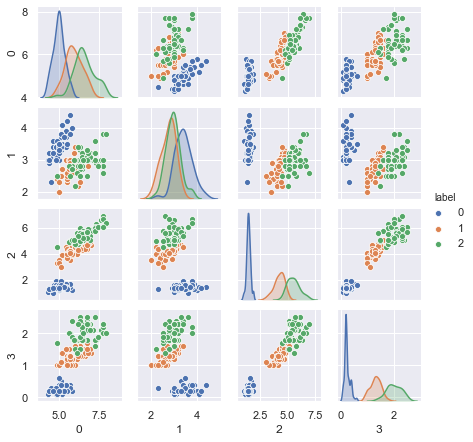

In [7]:
sns.pairplot(iris_all, hue='label', size=1.5)

## Scikit-Learn的评估器API
### API基础知识
Scikit-Learn评估器API的常用步骤如下所示(所有的示例都可以按照这个流程进行)：
1. 通过从 Scikit-Learn 中导入适当的评估器类，选择模型类
2. 用合适的数值对模型类进行实例化，配置模型超参数(hyperparameter)
3. 整理数据，通过前面介绍的方法获取特征矩阵和目标数组
4. 调用模型实例的fit()方法对数据进行拟合
5. 对新数据应用模型:
    1. 在有监督学习模型中，通常使用 predict() 方法预测新数据的标签
    2. 在无监督学习模型中，通常使用 transform() 或 predict() 方法转换或推断数据的性质

### 简单线性回归

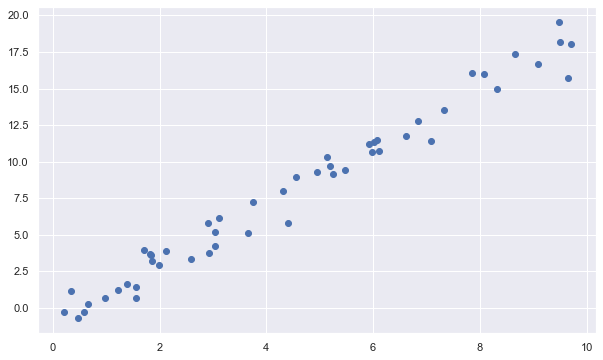

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
rng=np.random.RandomState(42)
x=10*rng.rand(50)
y=2*x-1+rng.randn(50)
plt.scatter(x,y)

在Scikit-Learn中，每个模型类都是一个Python类。因此，假如我们想要计算一个简单线性回归模型，那么可以直接导入线性回归模型类：

In [17]:
from sklearn.linear_model import LinearRegression

**选择模型超参数**：

当我们选择了模型类之后，还有许多参数需要配置。根据不同模型的不同情况，你可能
需要回答以下问题：
- 我们想要拟合偏移量（即直线的截距）吗？
- 我们需要对模型进行归一化处理吗？
- 我们需要对特征进行预处理以提高模型灵活性吗？
- 我们打算在模型中使用哪种正则化类型？
- 我们打算使用多少模型组件？

有一些重要的参数必须在选择模型类时确定好。这些参数通常被称为超参数，即在模型
拟合数据之前必须被确定的参数。

In [19]:
model=LinearRegression(fit_intercept=True)
# 实例化 LinearRegression 类
# 并用 fit_intercept超参数设置是否想要拟合直线的截距
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**parameter:**
- fit_intercept：拟合后的直线是否具有截距
- normalize：数据标准化处理
    - fit_intercept==False 时将忽略此参数
    - fit_intercept==True 时对X进行归一化处理
- copy_X ：如果为真，则复制X；否则，它可能被覆盖。
- n_jobs ：要用于计算的作业数。这只会为n_targets > 1和足够大的问题提供加速。


<font color=red>需要注意的是，对模型进行实例化其实仅仅是存储了超参数的值。</font>我们还没有将模型应用到数据上： Scikit-Learn 的 API 对选择模型和将模型应用到数据区别得很清晰

对数据进行简单的维度变换(50,)→(50,1)

In [27]:
print(x.shape)
X=x[:,np.newaxis]
print(X.shape)

(50,)
(50, 1)


In [28]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [29]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [30]:
model.fit(X,y)# 用模型拟合数据

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

在 Scikit-Learn 中，所有通过 fit()方法获得的模型参数都带一条下划线。例如，在线性回归模型中，模型参数如下所示：

In [31]:
print(model.coef_)# 直线斜率
print(model.intercept_)# 直线截距

[1.9776566]
-0.9033107255311164


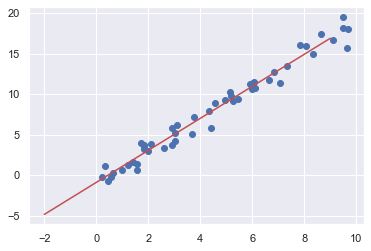

In [37]:
x1=np.arange(-2,10)
y1=model.coef_*x1+model.intercept_
plt.scatter(x,y)
plt.plot(x1,y1,color='r')# 画一条直线展示拟合结果

模型参数的不确定性是机器学习经常遇到的问题。一般情况下， Scikit-Learn 不会为用户提供直接从模型参数获得结论的工具；与其将模型参数解释为机器学习问题，不如说它更像统计建模问题。机器学习的重点并不是模型的预见性。如果你想要对**模型拟合参数的意义和其他相关参数分析工具**有更深入的理解，请参考**StatsModels Python 程序包。**

**预测新数据的标签：**

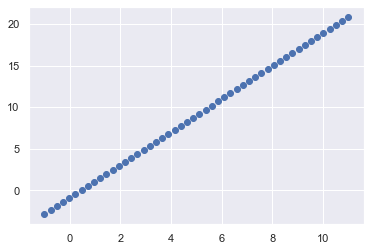

In [42]:
xfit = np.linspace(-1, 11)
Xfit=xfit[:,np.newaxis]
yfit=model.predict(Xfit)
plt.scatter(xfit,yfit)

### 有监督学习示例：朴素贝叶斯实现鸢尾花数据分类
对于鸢尾花的分类，我们将使用非常简单的高斯朴素贝叶斯（Gaussian naive Bayes）方法完成这个任务，这个方法假设每个特征中属于每一类的观测值都符合高斯分布（详情请参见 5.5 节）。**因为高斯朴素贝叶斯方法速度很快，而且不需要选择超参数**，所以通常很适合作为初步分类手段，在借助更复杂的模型进行优化之前使用。

先将数据集分为训练集和测试集：

In [64]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
#model_selection 现被用于sklearn的模型选择，继承了许多模型，包括分类，聚类，回归。。。
## train test 分割，同时打乱数据
Xtrain,Xtest,ytrain,ytest=train_test_split(iris_X,iris_y,random_state=1)

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain.iloc[:,[0,1,2,3]],ytrain.iloc[:,0])

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
y_model = model.predict(Xtest.iloc[:,[0,1,2,3]])# 测试集进行预测